In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
ResistividadR = np.genfromtxt('Resistividad0.txt', delimiter=' ')
#ResistividadR = np.reshape(Resistividad,(100,1))

In [6]:
#np.random.shuffle(ResistividadR)
#np.savetxt('Resistividad0.txt', ResistividadR, delimiter=' ')

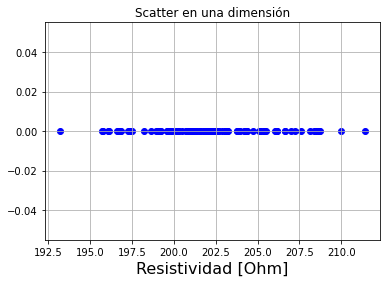

In [4]:
fig = plt.figure(figsize=[6,4])
ax = fig.subplots()

ax.set_title('Scatter en una dimensión')
ax.grid(True)
ax.set_xlabel('Resistividad [Ohm]', fontsize = 16)

ax.scatter(ResistividadR,np.zeros(len(ResistividadR)), marker ='o',color = 'b')


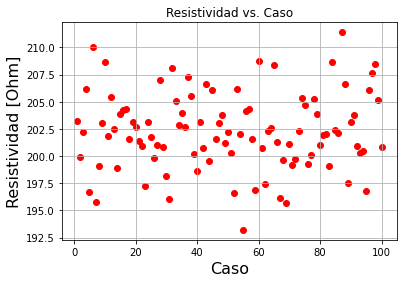

In [5]:
fig = plt.figure(figsize=[6,4])
ax = fig.subplots()

ax.set_title('Resistividad vs. Caso')
ax.grid(True)
ax.set_xlabel('Caso', fontsize=16 )
ax.set_ylabel('Resistividad [Ohm]', fontsize=16)

ax.scatter(np.arange(1,len(ResistividadR)+1),ResistividadR, marker = 'o', color = 'r')

(array([ 1.,  2.,  9., 12., 23., 25., 11.,  9.,  6.,  2.]),
 array([192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212]),
 <BarContainer object of 10 artists>)

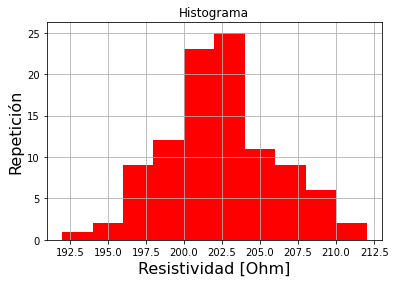

In [6]:
fig = plt.figure(figsize=[6,4])
ax = fig.subplots()
ax.set_title('Histograma')

ax.grid(True)
ax.set_xlabel('Resistividad [Ohm]', fontsize=16 )
ax.set_ylabel('Repetición', fontsize=16)

ax.hist(ResistividadR,bins = np.arange(192,214,2), color = 'r')



(array([0.005, 0.01 , 0.045, 0.06 , 0.115, 0.125, 0.055, 0.045, 0.03 ,
        0.01 ]),
 array([192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212]),
 <BarContainer object of 10 artists>)

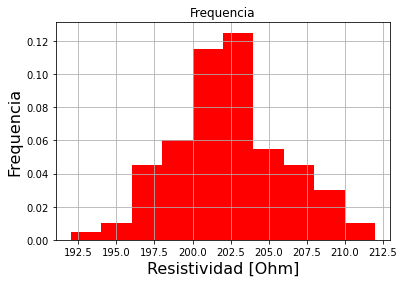

In [7]:
fig = plt.figure(figsize=[6,4])
ax = fig.subplots()

ax.set_title('Frequencia')
ax.grid(True)
ax.set_xlabel('Resistividad [Ohm]', fontsize=16 )
ax.set_ylabel('Frequencia', fontsize=16)

ax.hist(ResistividadR,bins = np.arange(192,214,2), color = 'r', density = True)


(array([0.01, 0.03, 0.12, 0.24, 0.47, 0.72, 0.83, 0.92, 0.98, 1.  , 1.  ]),
 array([192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214]),
 [<matplotlib.patches.Polygon at 0x2312b102700>])

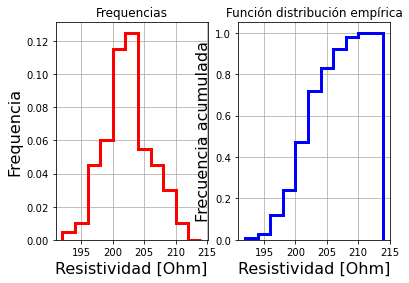

In [28]:
X_step = 2
X_range = np.arange(192,215,X_step)

fig = plt.figure(figsize=[6,4])
ax1,ax2 = fig.subplots(1,2)

ax1.set_title('Frequencias')
ax1.grid(True)
ax1.set_xlabel('Resistividad [Ohm]', fontsize=16 )
ax1.set_ylabel('Frequencia', fontsize=16)

ax1.hist(ResistividadR,bins = X_range, color = 'r',
         linewidth =3, density = True, histtype='step')

ax2.set_title('Función distribución empírica')
ax2.grid(True)
ax2.set_xlabel('Resistividad [Ohm]', fontsize=16 )
ax2.set_ylabel('Frecuencia acumulada', fontsize=16)

ax2.hist(ResistividadR,bins = X_range, color = 'b', 
         linewidth=3, density = True, histtype='step',cumulative=1)

In [29]:
media_R = np.mean(ResistividadR)
std_R = np.std(ResistividadR)
std_media_R = std_R / np.sqrt(len(ResistividadR))

In [30]:
print('Media muestral de la resistividad: {:6.2f} \nDesviación estadandar muestral: {:6.2f} \nDesviación estadandar de la media muestral: {:6.2f} '.format(media_R,std_R,std_media_R))

Media muestral de la resistividad: 202.28 
Desviación estadandar muestral:   3.52 
Desviación estadandar de la media muestral:   0.35 


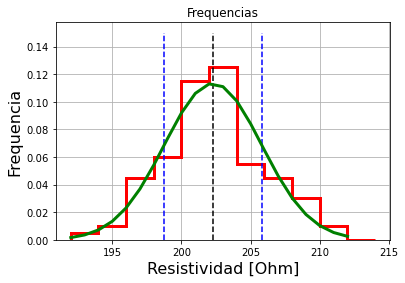

In [31]:
fig = plt.figure(figsize=[6,4])
ax1 = fig.subplots()

ax1.set_title('Frequencias')
ax1.grid(True)
ax1.set_xlabel('Resistividad [Ohm]', fontsize=16 )
ax1.set_ylabel('Frequencia', fontsize=16)

ax1.hist(ResistividadR,bins = X_range, color = 'r',
         linewidth =3, density = True, histtype='step')

ax1.plot([media_R,media_R],[0,.15],'--k')
ax1.plot([media_R-std_R, media_R -std_R],[0,.15],'--b')
ax1.plot([media_R+std_R, media_R +std_R],[0,.15],'--b')

X_hist = np.arange(192,213,1)
ax1.plot(X_hist,stats.norm.pdf(X_hist, loc = media_R, scale = std_R),'-g', lw=3)

In [32]:
n_1sigma = np.sum((ResistividadR > media_R-std_R) & (ResistividadR < media_R+std_R))
n_2sigma = np.sum((ResistividadR > media_R-2*std_R) & (ResistividadR < media_R+2*std_R))

In [33]:
print('Probabiliad del rango +-1 sigma: {:4.2f}'.format(n_1sigma/len(ResistividadR)))
print('Probabiliad del rango +-2 sigma: {:4.2f}'.format(n_2sigma/len(ResistividadR)))

Probabiliad del rango +-1 sigma: 0.69
Probabiliad del rango +-2 sigma: 0.97


In [61]:
Resistividad2 = stats.norm.rvs(loc=207, scale = 2.52, size = 200)
Resistividad3 = stats.norm.rvs(loc=202.28, scale = 1.52, size = 200)

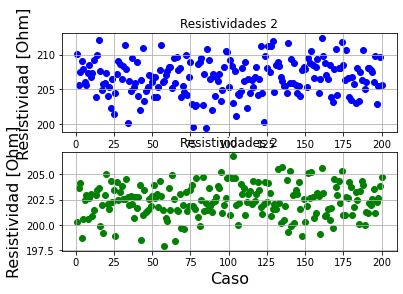

In [62]:
fig = plt.figure(figsize=[6,4])
ax1,ax2 = fig.subplots(2,1)

ax1.set_title('Resistividades 2')
ax1.grid(True)
ax1.set_ylabel('Resistividad [Ohm]', fontsize=16 )
ax1.set_xlabel('Caso', fontsize=16)

ax1.scatter(np.arange(1,len(Resistividad2)+1),Resistividad2,color='b')

ax2.set_title('Resistividades 2')
ax2.grid(True)
ax2.set_ylabel('Resistividad [Ohm]', fontsize=16 )
ax2.set_xlabel('Caso', fontsize=16)

ax2.scatter(np.arange(1,len(Resistividad3)+1),Resistividad3,color='g')

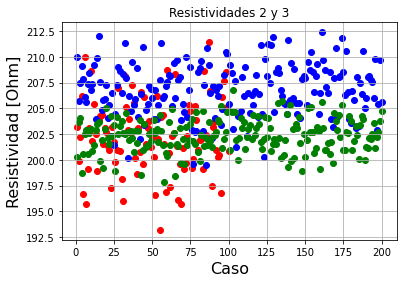

In [63]:
fig = plt.figure(figsize=[6,4])
ax1 = fig.subplots()

ax1.set_title('Resistividades 2 y 3')
ax1.grid(True)
ax1.set_ylabel('Resistividad [Ohm]', fontsize=16 )
ax1.set_xlabel('Caso', fontsize=16)

ax1.scatter(np.arange(1,len(ResistividadR)+1),ResistividadR,color='r')
ax1.scatter(np.arange(1,len(Resistividad2)+1),Resistividad2,color='b')
ax1.scatter(np.arange(1,len(Resistividad3)+1),Resistividad3,color='g')

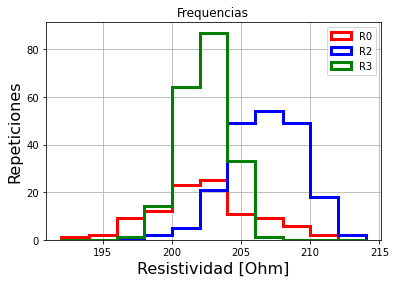

In [66]:
fig = plt.figure(figsize=[6,4])
ax1 = fig.subplots()

ax1.set_title('Frequencias')
ax1.grid(True)
ax1.set_xlabel('Resistividad [Ohm]', fontsize=16 )
ax1.set_ylabel('Repeticiones', fontsize=16)

ax1.hist(ResistividadR,bins = X_range, color = 'r',
         linewidth =3, density = False, histtype='step',label='R0')
ax1.hist(Resistividad2,bins = X_range, color = 'b',
         linewidth =3, density = False, histtype='step', label='R2')
ax1.hist(Resistividad3,bins = X_range, color = 'g',
         linewidth =3, density = False, histtype='step', label='R3')
ax1.legend()

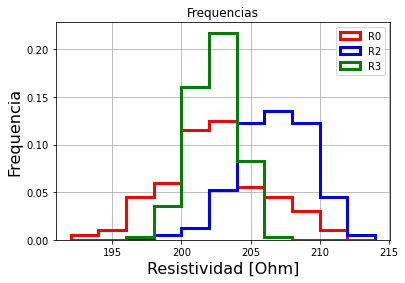

In [67]:
fig = plt.figure(figsize=[6,4])
ax1 = fig.subplots()

ax1.set_title('Frequencias')
ax1.grid(True)
ax1.set_xlabel('Resistividad [Ohm]', fontsize=16 )
ax1.set_ylabel('Frequencia', fontsize=16)

ax1.hist(ResistividadR,bins = X_range, color = 'r',
         linewidth =3, density = True, histtype='step',label='R0')
ax1.hist(Resistividad2,bins = X_range, color = 'b',
         linewidth =3, density = True, histtype='step', label='R2')
ax1.hist(Resistividad3,bins = X_range, color = 'g',
         linewidth =3, density = True, histtype='step', label='R3')
ax1.legend()

In [69]:
media_R2 = np.mean(Resistividad2)
std_R2 = np.std(Resistividad2)

media_R3 = np.mean(Resistividad3)
std_R3 = np.std(Resistividad3)

print('Medias: {:6.2f} {:6.2f} {:6.2f}'.format(media_R,media_R2,media_R3))
print('STD: {:6.2f} {:6.2f} {:6.2f}'.format(std_R,std_R2,std_R3))

Medias: 202.28 206.73 202.38
STD:   3.52   2.57   1.62


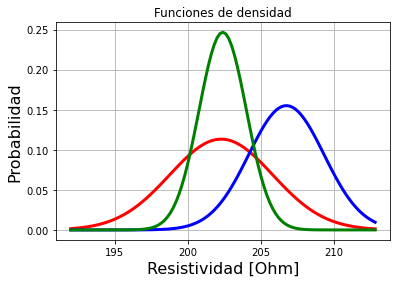

In [74]:
fig = plt.figure(figsize=[6,4])
ax1 = fig.subplots()

ax1.set_title('Funciones de densidad')
ax1.grid(True)
ax1.set_xlabel('Resistividad [Ohm]', fontsize=16 )
ax1.set_ylabel('Probabilidad', fontsize=16)

X_hist = np.arange(192,213,.2)
ax1.plot(X_hist,stats.norm.pdf(X_hist, loc = media_R, scale = std_R),'-r', lw=3)
ax1.plot(X_hist,stats.norm.pdf(X_hist, loc = media_R2, scale = std_R2),'-b', lw=3)
ax1.plot(X_hist,stats.norm.pdf(X_hist, loc = media_R3, scale = std_R3),'-g', lw=3)

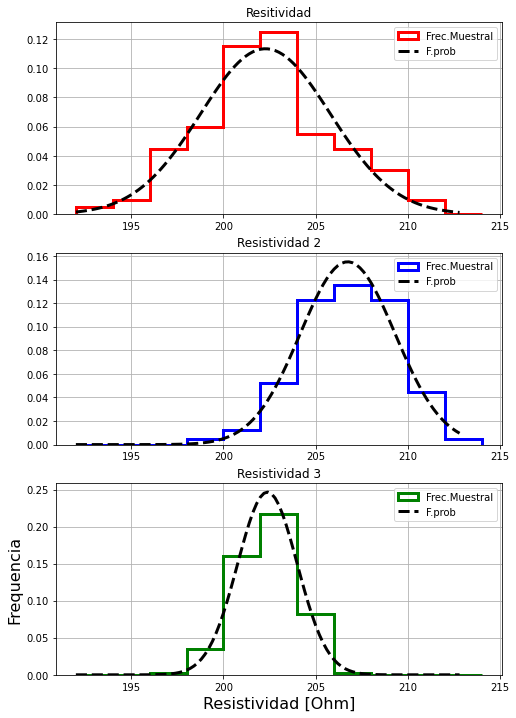

In [89]:
fig = plt.figure(figsize=[8,12])
ax1,ax2,ax3 = fig.subplots(3,1)

ax1.set_title('Resitividad')
ax1.grid(True)
ax1.hist(ResistividadR,bins = X_range, color = 'r',
         linewidth =3, density = True, histtype='step',label='Frec.Muestral')
ax1.plot(X_hist,stats.norm.pdf(X_hist, loc = media_R, scale = std_R),'--k', lw=3, label='F.prob')
ax1.legend()

ax2.set_title('Resistividad 2')
ax2.grid(True)
ax2.hist(Resistividad2,bins = X_range, color = 'b',
         linewidth =3, density = True, histtype='step',label='Frec.Muestral')
ax2.plot(X_hist,stats.norm.pdf(X_hist, loc = media_R2, scale = std_R2),'--k', lw=3, label='F.prob')
ax2.legend()

ax3.set_title('Resistividad 3')
ax3.grid(True)
ax3.set_xlabel('Resistividad [Ohm]', fontsize=16 )
ax3.set_ylabel('Frequencia', fontsize=16)

ax3.hist(Resistividad3,bins = X_range, color = 'g',
       linewidth =3, density = True, histtype='step',label='Frec.Muestral')
ax3.plot(X_hist,stats.norm.pdf(X_hist, loc = media_R3, scale = std_R3),'--k', lw=3, label='F.prob')
ax3.legend()